In [1]:
import os, glob, random

def get_image_path_by_id(patient_id, image_dir):
    image_order  = patient_id
    file_name = [os.path.relpath(os.path.join(image_dir, x)) \
                    for x in os.listdir(image_dir) \
                    if os.path.isfile(os.path.join(image_dir, x)) and patient_id in x][0] 
    return file_name

In [2]:
from medpy.metric import binary
import pandas as pd
import SimpleITK as sitk
import numpy as np


manual_seg_dir =  'nnUNet_raw_data_base/nnUNet_test_data/test_seg_in_nii/'
auto_seg_dir =  'nnUNet_raw_data_base/nnUNet_test_data/test_label_in_nii/'
csv_write_path= 'nnUNet_raw_data_base/nnUNet_test_data/MRI_metrics_test.csv'

df_init = pd.DataFrame()

label_paths = []
for r, d, f in os.walk(manual_seg_dir):
    for file in f:
        if '.nii.gz' in file :
                label_path = os.path.join(r, file)
                label_paths.append(label_path)
i=0                

for idx,label_path in enumerate(label_paths):
    d= label_path.split('/')[-1]
    
    indices = [i for i, c in enumerate(d) if c == '_']
    pid = d[:indices[1]]
    if len(indices)>2 and 'Bd' in d:
        pid = d[:indices[2]]     
#     pid = d.replace('_img_L2-L5_nnunet_to_seg.nii.gz','')
    print(d, pid)
    
    
    auto_seg_path = get_image_path_by_id(pid , auto_seg_dir)
    manual_seg_path = get_image_path_by_id(pid , manual_seg_dir)
    
    if os.path.exists(auto_seg_path) and os.path.exists(manual_seg_path) :
        i=i+1
        print(i, pid, 'mapped ',auto_seg_path, 'yeah!!!!!!!!!\n')
        manual_seg_sitk = sitk.ReadImage(manual_seg_path)
        mskCube  = sitk.GetArrayFromImage(manual_seg_sitk)
        auto_seg_sitk = sitk.ReadImage(auto_seg_path)
        prdCube = sitk.GetArrayFromImage(auto_seg_sitk)

        dice_score = binary.dc(prdCube,mskCube)

        
        mskCube1 = np.copy(mskCube)
        mskCube1[mskCube1!=1]=0      
        prdCube1 = np.copy(prdCube)
        prdCube1[prdCube1!=1]=0
        dsc1 = binary.dc(prdCube1,mskCube1)
        
        mskCube2 = np.copy(mskCube)
        mskCube2[mskCube2!=2]=0
        prdCube2 = np.copy(prdCube)
        prdCube2[prdCube2!=2]=0
        dsc2 = binary.dc(prdCube2,mskCube2)
        
        mskCube3 = np.copy(mskCube)
        mskCube3[mskCube3!=3]=0
        prdCube3 = np.copy(prdCube)
        prdCube3[prdCube3!=3]=0
        dsc3 = binary.dc(prdCube3,mskCube3)
        
        mskCube4 = np.copy(mskCube)
        mskCube4[mskCube4!=4]=0
        prdCube4 = np.copy(prdCube)
        prdCube4[prdCube4!=4]=0
        dsc4 = binary.dc(prdCube4,mskCube4)


        df = pd.DataFrame({'CT_id': pid           
                           ,  'dsc_global':round(dice_score,5)
                            ,  'dsc_1':round(dsc1, 5)
                           ,  'dsc_2':round(dsc2, 5)
                           ,  'dsc_3':round(dsc3, 5)
                           ,  'dsc_4':round(dsc4, 5)
                          },index=[0])
        df_init = df_init.append(df)
        df_init.to_csv(csv_write_path )
        print(idx,'th pid:',pid,'dsc',round(dice_score,5) ,'done into\n',csv_write_path)
        print('dsc_1', round(dsc1, 5), 'dsc_2', round(dsc2, 5), 'dsc_3', round(dsc3, 5), 'dsc_4', round(dsc4, 5))
        print(' \n\n\n')

West_Bd_102_img_L2-L5_nnunet_to_seg_top1_mask_LPM.nii.gz West_Bd_102
1 West_Bd_102 mapped  nnUNet_raw_data_base/nnUNet_test_data/test_label_in_nii/West_Bd_102_seg_L2-L5.nii.gz yeah!!!!!!!!!

0 th pid: West_Bd_102 dsc 0.97403 done into
 nnUNet_raw_data_base/nnUNet_test_data/MRI_metrics_test.csv
dsc_1 0.96952 dsc_2 0.96695 dsc_3 0.96442 dsc_4 0.96918
 



Jake_102_img_L2-L5_nnunet_to_seg_top1_mask_LPM.nii.gz Jake_102
2 Jake_102 mapped  nnUNet_raw_data_base/nnUNet_test_data/test_label_in_nii/Jake_102_seg_L2-L5-segmentation-label.nii.gz yeah!!!!!!!!!

1 th pid: Jake_102 dsc 0.94686 done into
 nnUNet_raw_data_base/nnUNet_test_data/MRI_metrics_test.csv
dsc_1 0.9373 dsc_2 0.91685 dsc_3 0.92175 dsc_4 0.94899
 



Jake_115_img_L2-L5_nnunet_to_seg_top1_mask_LPM.nii.gz Jake_115
3 Jake_115 mapped  nnUNet_raw_data_base/nnUNet_test_data/test_label_in_nii/Jake_115_seg_L2-L5-segmentation-label.nii.gz yeah!!!!!!!!!

2 th pid: Jake_115 dsc 0.94137 done into
 nnUNet_raw_data_base/nnUNet_test_data/MRI_met

In [13]:
print(df_init.shape)
df_init.head()

(10, 6)


,CT_id,dsc_global,dsc_1,dsc_2,dsc_3,dsc_4
0,Jake_115,0.94137,0.93222,0.91313,0.91238,0.94972
0,West_Bd_101,0.97131,0.96842,0.95171,0.95658,0.97188
0,Jake_106,0.94676,0.94086,0.92870,0.93379,0.94096
0,West_Bd_106,0.97328,0.96686,0.96060,0.96005,0.97219
0,Jake_103,0.95094,0.93354,0.93207,0.91834,0.93269


(array([1., 0., 0., 0., 2., 0., 0., 0., 2., 0., 1., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 1., 1., 2.]),
 array([0.93345  , 0.9350732, 0.9366964, 0.9383196, 0.9399428, 0.941566 ,
        0.9431892, 0.9448124, 0.9464356, 0.9480588, 0.949682 , 0.9513052,
        0.9529284, 0.9545516, 0.9561748, 0.957798 , 0.9594212, 0.9610444,
        0.9626676, 0.9642908, 0.965914 , 0.9675372, 0.9691604, 0.9707836,
        0.9724068, 0.97403  ]),
 <BarContainer object of 25 artists>)

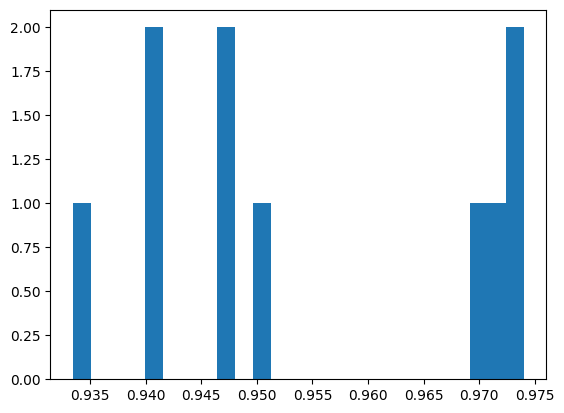

In [15]:
import matplotlib.pyplot as plt
plt.hist( df_init['dsc_global'],bins = 25)
# plt.imshow

In [10]:
print(np.mean(df_init['dsc_global']), np.std(df_init['dsc_global']),df_init['dsc_global'].shape)

0.81808 0.0 (1,)
